In [1]:
using PyPlot
using Revise
using MDToolbox
PyPlot.plt.style.use("seaborn-colorblind");
ENV["COLUMNS"] = 110; #display width for MDToolbox

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /opt/julia_depot/packages/Revise/Pcs5V/src/Revise.jl:1217


In [2]:
pdb = readpdb("data/3gb1.pdb")

32x855 TrjArray
| A                          | A                          |  …   A                          |
| 1MET                       | 1MET                       |  …   56GLU                      |
| 1N                         | 2CA                        |  …   855HG3                     |
|   -13.15    -1.71     5.51 |   -12.20    -2.85     5.70 |  …      10.24     2.24    -4.53 |
|   -13.16    -2.75     4.19 |   -12.38    -3.43     5.26 |         10.29     1.79    -3.20 |
|   -13.26    -2.20     5.12 |   -12.23    -3.26     5.29 |         11.09     3.24    -6.13 |
|   -12.45    -4.30     6.28 |   -12.25    -3.22     5.28 |         11.75     2.57    -3.31 |
|   -13.05    -1.52     5.31 |   -12.15    -2.68     5.56 |         10.46     1.51    -3.50 |
|   -12.98    -3.74     6.65 |   -12.43    -3.31     5.34 |  …      11.26     3.06    -3.59 |
|   -13.03    -2.10     3.64 |   -12.47    -2.79     4.83 |         10.38     1.53    -3.30 |
|   -13.00    -2.17     5.21 |   -12.09    -

In [3]:
pdb = pdb["atomname CA"]

32x56 TrjArray
| A                          | A                          |  …   A                          |
| 1MET                       | 2THR                       |  …   56GLU                      |
| 1CA                        | 2CA                        |  …   56CA                       |
|   -12.20    -2.85     5.70 |    -8.56    -2.53     6.83 |  …      11.49     0.13    -5.58 |
|   -12.38    -3.43     5.26 |    -8.87    -2.64     6.54 |         11.44     0.44    -5.31 |
|   -12.23    -3.26     5.29 |    -8.72    -2.69     6.68 |         11.25     0.63    -5.48 |
|   -12.25    -3.22     5.28 |    -8.71    -2.59     6.57 |         11.68    -0.09    -5.47 |
|   -12.15    -2.68     5.56 |    -8.52    -2.44     6.78 |         11.68    -0.04    -5.48 |
|   -12.43    -3.31     5.34 |    -8.88    -2.65     6.64 |  …      11.38     0.31    -5.62 |
|   -12.47    -2.79     4.83 |    -8.96    -2.38     6.31 |         11.32     0.25    -5.52 |
|   -12.09    -3.19     5.78 |    -8.49    -2

In [4]:
pdb_fitted = superimpose(pdb[1, :], pdb)

32x56 TrjArray
| A                          | A                          |  …   A                          |
| 1MET                       | 2THR                       |  …   56GLU                      |
| 1CA                        | 2CA                        |  …   56CA                       |
|   -12.20    -2.85     5.70 |    -8.56    -2.53     6.83 |  …      11.49     0.13    -5.58 |
|   -12.38    -3.43     5.26 |    -8.87    -2.64     6.54 |         11.43     0.45    -5.31 |
|   -12.23    -3.26     5.30 |    -8.71    -2.69     6.69 |         11.24     0.63    -5.49 |
|   -12.24    -3.26     5.31 |    -8.70    -2.62     6.60 |         11.66    -0.06    -5.49 |
|   -12.16    -2.69     5.58 |    -8.52    -2.45     6.80 |         11.66    -0.02    -5.49 |
|   -12.41    -3.32     5.37 |    -8.86    -2.67     6.66 |  …      11.36     0.32    -5.64 |
|   -12.47    -2.80     4.83 |    -8.96    -2.39     6.30 |         11.33     0.26    -5.52 |
|   -12.08    -3.19     5.78 |    -8.49    -2

In [5]:
rmsd = getrmsd(pdb[1, :], pdb_fitted)

32-element Array{Float64,1}:
 8.554842949272357e-17
 0.28146368488385065
 0.27503507484757395
 0.24973464134169102
 0.22735600178052792
 0.26530091251887283
 0.2896930799781517
 0.2753408219451509
 0.28156436934104045
 0.2782390718028653
 0.30998277656974943
 0.1749682005718791
 0.2804481185873862
 ⋮
 0.26335019491087885
 0.2893699304820769
 0.3094246428638835
 0.25404746685533475
 0.27558337949017114
 0.1926899282393233
 0.2504340688606254
 0.20596652429140355
 0.22978870831859918
 0.2535727519868658
 0.24359209784417912
 0.262633972279415

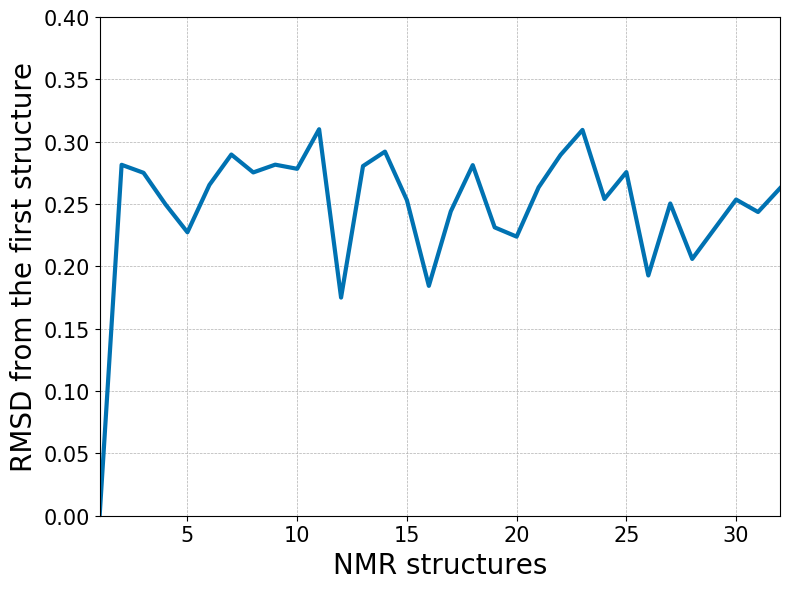

In [6]:
fig, ax = subplots(figsize=(8, 6))
ax.plot(1:pdb.nframe,rmsd,linewidth=3)
xlabel("NMR structures",fontsize=20)
ylabel("RMSD from the first structure",fontsize=20)

# detailed options (not necessary, just for reference)
ax.set(xlim=[1, pdb.nframe], ylim=[0.0, 0.4])
ax.grid(linestyle="--", linewidth=0.5)
ax.xaxis.set_tick_params(which="major",labelsize=15)
ax.yaxis.set_tick_params(which="major",labelsize=15)
ax.grid(linestyle="--", linewidth=0.5)
tight_layout()

savefig("superimpose_rmsd.png", dpi=350)